<a href="https://colab.research.google.com/github/shaina-12/Artificial-Intelligence/blob/main/Machine%20Learning/Agglomerative_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


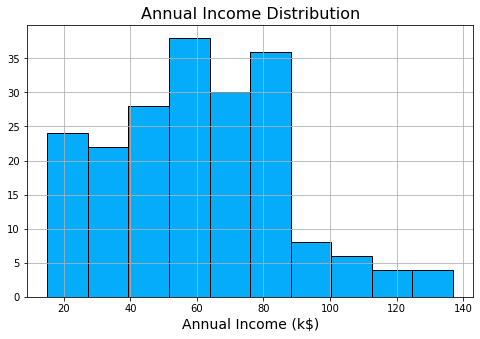

In [6]:
plt.figure(figsize=(8,5))
plt.title('Annual Income Distribution',fontsize=16)
plt.xlabel('Annual Income (k$)',fontsize=14)
plt.grid()
plt.hist(data['Annual Income (k$)'],color='#04acfa',edgecolor='k')
plt.show()

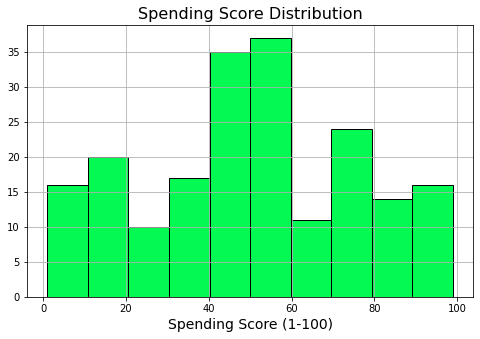

In [7]:
plt.figure(figsize=(8,5))
plt.title('Spending Score Distribution',fontsize=16)
plt.xlabel('Spending Score (1-100)',fontsize=14)
plt.grid()
plt.hist(data['Spending Score (1-100)'],color='#04fa52',edgecolor='k')
plt.show()

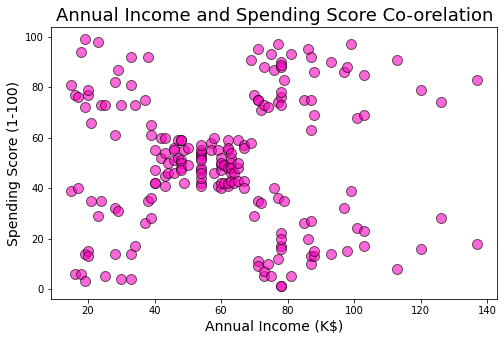

In [8]:
plt.figure(figsize=(8,5))
plt.title('Annual Income and Spending Score Co-orelation',fontsize=18)
plt.xlabel('Annual Income (K$)',fontsize=14)
plt.ylabel('Spending Score (1-100)',fontsize=14)
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'],color='#fa04bd',edgecolor='k',alpha=0.6, s=100)
plt.show()

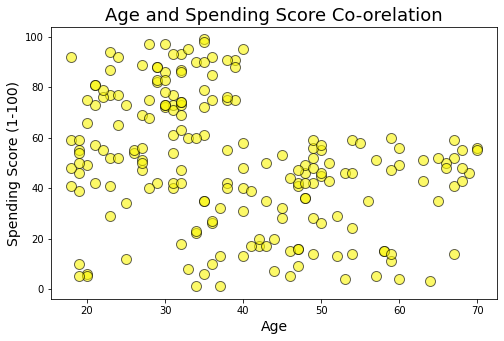

In [9]:
plt.figure(figsize=(8,5))
plt.title('Age and Spending Score Co-orelation',fontsize=18)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Spending Score (1-100)',fontsize=14)
plt.scatter(data['Age'],data['Spending Score (1-100)'],color='#faf604',edgecolor='k',alpha=0.6, s=100)
plt.show()

In [10]:
x = data.iloc[:,[3,4]].values

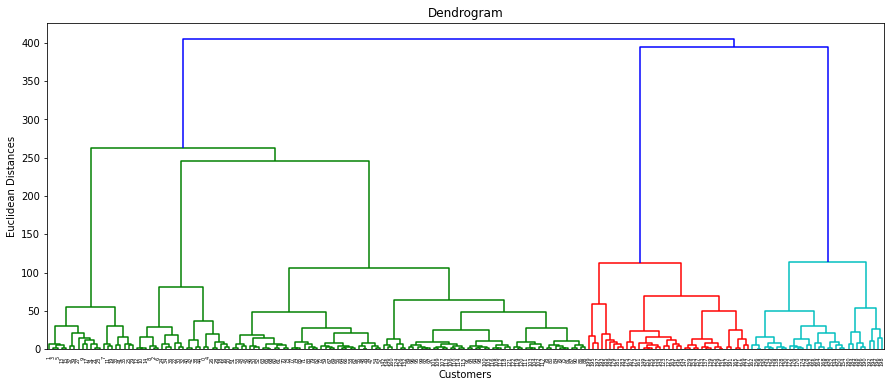

In [13]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
dendrogram = sch.dendrogram(sch.linkage(x,method='ward'))
plt.show()

In [14]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(x)

In [15]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

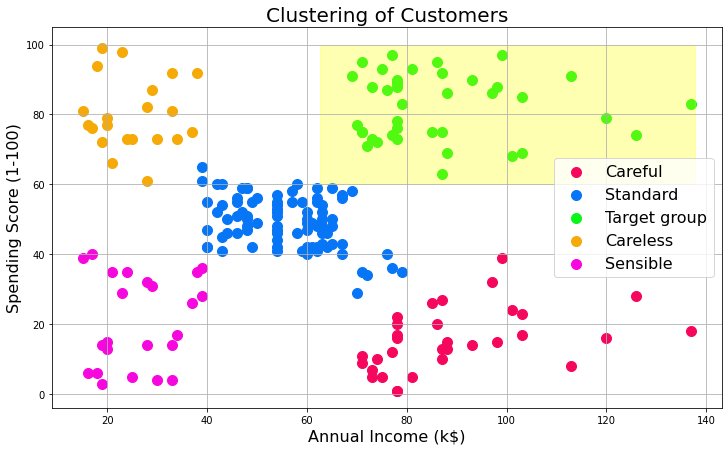

In [20]:
plt.figure(figsize=(12,7))
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = '#f6075e', label = 'Careful')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = '#0776f6', label = 'Standard')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = '#07f617', label = 'Target group')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = '#f6aa07', label = 'Careless')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = '#f607de', label = 'Sensible')
plt.title('Clustering of Customers',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=16)
plt.ylabel('Spending Score (1-100)',fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.axhspan(ymin=60,ymax=100,xmin=0.4,xmax=0.96,alpha=0.3,color='yellow')
plt.show()